In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot

import re
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [3]:
df = pd.read_csv('clean_H1B_data.csv')

In [8]:
df.head()

,PREVAILING_WAGE,cluster_job_title,CASE_STATUS_code,EMPLOYER_NAME_code,FULL_TIME_POSITION_code,YEAR_code,SOC_NAME1_code,state_code
0,36067.0,18,1,915,0,5,13,22
1,91021.0,8,1,621,1,5,13,45
2,105914.0,13,1,621,1,5,13,5
3,90834.0,12,1,621,1,5,13,51
4,117998.0,8,1,621,1,5,13,4


In [5]:
df.CASE_STATUS_code = df.CASE_STATUS_code.replace(1,"denied")
df.CASE_STATUS_code = df.CASE_STATUS_code.replace(0,"certified")

In [7]:
df.CASE_STATUS_code = df.CASE_STATUS_code.replace("denied",0)
df.CASE_STATUS_code = df.CASE_STATUS_code.replace("certified",1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799076 entries, 0 to 2799075
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   PREVAILING_WAGE          float64
 1   cluster_job_title        int64  
 2   CASE_STATUS_code         int64  
 3   EMPLOYER_NAME_code       int64  
 4   FULL_TIME_POSITION_code  int64  
 5   YEAR_code                int64  
 6   SOC_NAME1_code           int64  
 7   state_code               int64  
dtypes: float64(1), int64(7)
memory usage: 170.8 MB


In [10]:

#Splitting data, model training and evaluation process

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

import os



new_df = pd.DataFrame()
new_df = df.copy()
new_df


new_df.head()

new_df.shape

new_df.info()

new_df = new_df.drop("CASE_STATUS_code", axis=1)

new_df["label"] = df["CASE_STATUS_code"]

new_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799076 entries, 0 to 2799075
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   PREVAILING_WAGE          float64
 1   cluster_job_title        int64  
 2   CASE_STATUS_code         int64  
 3   EMPLOYER_NAME_code       int64  
 4   FULL_TIME_POSITION_code  int64  
 5   YEAR_code                int64  
 6   SOC_NAME1_code           int64  
 7   state_code               int64  
dtypes: float64(1), int64(7)
memory usage: 170.8 MB


,PREVAILING_WAGE,cluster_job_title,EMPLOYER_NAME_code,FULL_TIME_POSITION_code,YEAR_code,SOC_NAME1_code,state_code,label
0,36067.0,18,915,0,5,13,22,1
1,91021.0,8,621,1,5,13,45,1
2,105914.0,13,621,1,5,13,5,1
3,90834.0,12,621,1,5,13,51,1
4,117998.0,8,621,1,5,13,4,1


In [11]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
# import xgboost as xgb

In [3]:
from sklearn.model_selection import train_test_split

In [14]:
#Split training and testing dataset


y = new_df["label"]
x = new_df.iloc[:,0:5]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

print(f"Train labels:\n{y_train}")
print(f"Test labels:\n{y_test}")

df_a = x_train
df_b = y_train

training_data = pd.concat([df_a,df_b],axis = 1, join = "inner")

training_data

testing_data = pd.concat([x_test,y_test], axis = 1, join = "inner")

testing_data

training_data.to_csv("C:/Users/zny_1/Desktop/training data.csv", index = False)
testing_data.to_csv("C:/Users/zny_1/Desktop/final holdout data.csv", index = False)

Train labels:
1703598    1
95173      1
1947019    1
891957     1
2220245    1
          ..
1692743    1
2356330    1
2229084    0
2768307    1
2219110    1
Name: label, Length: 1959353, dtype: int64
Test labels:
2670282    1
2145644    1
2750608    1
102973     1
2515594    1
          ..
2483187    1
2039576    1
850905     1
1459168    1
2260276    1
Name: label, Length: 839723, dtype: int64


In [15]:
training_data["label"].unique()

array([1, 0], dtype=int64)

In [4]:
#reload training data

train_df=pd.read_csv('C:/Users/14264/Desktop/training data.csv')    
train_df.head()

train_df.shape

#new_train_df = train_df.copy()
nt_df = train_df.copy()

# split training and testing data in the training set for model training process
Y = nt_df["label"]
X = nt_df.iloc[:,0:5]

train_x, test_x, train_y, test_y = train_test_split(X, Y, 
                                                    train_size=0.7, 
                                                    random_state=42)

In [5]:
from imblearn.over_sampling import SMOTE

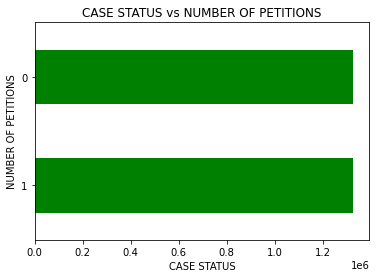

In [6]:
# Dealing with unbalanced dataset problem

oversample = SMOTE()
new_train_x, new_train_y = oversample.fit_resample(train_x, train_y)

plot_status_numberinit = new_train_y.value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'barh', color = 'green')
plot_status_numberinit.set_xlabel("CASE STATUS")
plot_status_numberinit.set_ylabel("NUMBER OF PETITIONS")
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

In [8]:
#Training models

def fit_model (model):
    classifier = model()  #train with default model parameters
    classifier.fit(new_train_x, new_train_y)
    print("training accuracy is:",classifier.score(new_train_x, new_train_y))
    print("testing accuracy is:",classifier.score(test_x, test_y))   
    return classifier
    
# the fit_model function will return the mean accuracy of given test data and labels

# calculate precision, recall, fscore, and support score for the model
from sklearn.metrics import precision_recall_fscore_support

def prfs (trained_model):
    pred_label = trained_model.predict(test_x)
    print("When positive class refers to \"running\", the precision, recall, f_measure and support for the model is :",
          precision_recall_fscore_support(test_y, pred_label, average = "binary"))

    

# Calculate the roc graph and auc score on parameters, but how to overlap the results from different models?
def roc_auc(trained_model):
    plot_roc_curve(trained_model, test_x, test_y)
    roc_auc_score(test_y,trained_model.predict(test_x))
    



    
# cross validation
# roc curve put them together
# look at before final projects
# understand each algorithms

In [9]:
#calculate the cross validation to train better models
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold
import statistics

#scores: evaluate model with mean accuracy score across multiple splits of training dataset
def cv (trained_model):
    cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 345256)   #create the cross_validation proces
    scores = cross_val_score(trained_model, new_train_x, new_train_y, scoring = "accuracy", cv = cv, n_jobs = -1)
    # result = cross_validate(trained_model)
    print("Accuracy: %.3f (%.3f)" % (np.mean(scores), np.std(scores)))

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
#decision tree
dt1 = fit_model(DecisionTreeClassifier)




training accuracy is: 0.9489150117635725
testing accuracy is: 0.8660068117712306


In [31]:
cv(dt1)   #cv accuracy is slightly lower than training accuracy, but almost the same , so no obvious overfitting problem

Accuracy: 0.904 (0.001)


In [32]:
prfs(dt1)

When positive class refers to "running", the precision, recall, f_measure and support for the model is : (0.9770113377802844, 0.8824214427484939, 0.9273104823079905, None)


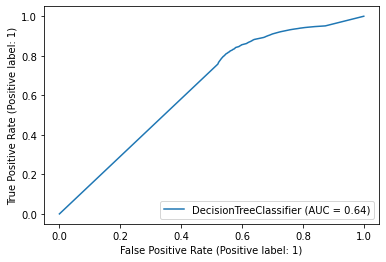

In [33]:
roc_auc(dt1)

In [12]:
#random forest
rf1 = fit_model(RandomForestClassifier)



training accuracy is: 0.9488762514318744
testing accuracy is: 0.8725667992500927


In [29]:
cv(rf1)

Accuracy: 0.907 (0.001)


In [25]:
prfs(rf1)

When positive class refers to "running", the precision, recall, f_measure and support for the model is : (0.9767922235722964, 0.8895666836456888, 0.9311411814454598, None)


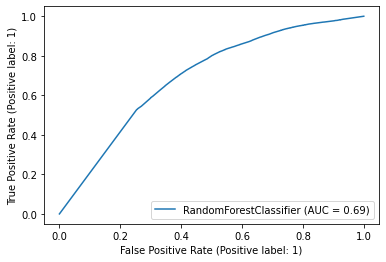

In [24]:
roc_auc(rf1)

In [31]:
#logistic regression

lr1 = fit_model(LogisticRegression)




training accuracy is: 0.5861864198850286
testing accuracy is: 0.5322946686491802


In [32]:
#naive baysian classifier:
nb1= fit_model(GaussianNB)

training accuracy is: 0.7192178992953898
testing accuracy is: 0.6653079417358788


In [26]:
#gradient boosting model
gb1 = fit_model(GradientBoostingClassifier)



training accuracy is: 0.7714367213124624
testing accuracy is: 0.7640258860916697


When positive class refers to "running", the precision, recall, f_measure and support for the model is : (0.9837840995647749, 0.7690443152477473, 0.8632602744317504, None)


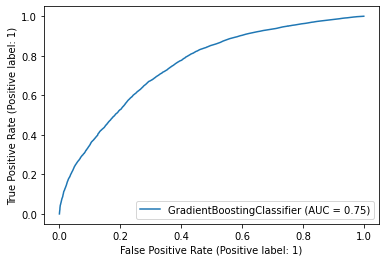

In [27]:
prfs(gb1)
roc_auc(gb1)

In [28]:
cv(gb1)

Accuracy: 0.771 (0.001)


In [36]:
#stochastic gradient decient model
sgd1 = fit_model(SGDClassifier)




training accuracy is: 0.5899845560775447
testing accuracy is: 0.9159756790505711


In [37]:
#perceptron classifier
perceptron1 = fit_model(Perceptron)




training accuracy is: 0.5000003763138999
testing accuracy is: 0.031432139175170036


Feature: 0, Score: 0.47001
Feature: 1, Score: 0.09468
Feature: 2, Score: 0.20268
Feature: 3, Score: 0.04883
Feature: 4, Score: 0.18381


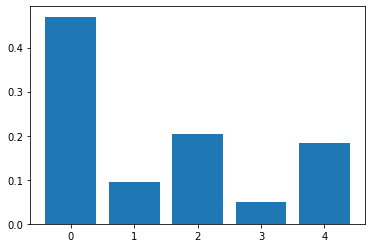

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
from matplotlib import pyplot
# fit the model
model.fit(new_train_x, new_train_y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [12]:
test_df=pd.read_csv('C:/Users/zny_1/Desktop/final holdout data.csv')

In [13]:
X_testnew = test_df.iloc[:,0:5]
X_testnew

,PREVAILING_WAGE,cluster_job_title,EMPLOYER_NAME_code,FULL_TIME_POSITION_code,YEAR_code
0,84344.0,1,621,1,0
1,66955.0,4,24,1,1
2,83178.0,6,621,1,0
3,45864.0,10,19,0,5
4,105123.0,1,538,1,0
...,...,...,...,...,...
839718,80600.0,8,621,1,0
839719,97136.0,8,621,1,2
839720,66726.4,9,621,1,4
839721,77626.0,10,68,1,3


In [14]:
y_pred = model.predict(X_testnew)

In [31]:
print(y_pred)

[1 1 0 ... 0 1 1]


In [39]:
predict = pd.DataFrame({"pred" : y_pred})

In [40]:
predict

,pred
0,1
1,1
2,0
3,1
4,1
...,...
839718,0
839719,0
839720,0
839721,1


In [41]:
predict.to_csv("C:/Users/zny_1/Desktop/predict result.csv", index = False)

In [45]:
testresult.label

0         1
1         1
2         1
3         1
4         1
         ..
839718    1
839719    1
839720    1
839721    1
839722    1
Name: label, Length: 839723, dtype: int64

In [46]:
testresult.pred

0         1
1         1
2         0
3         1
4         1
         ..
839718    0
839719    0
839720    0
839721    1
839722    1
Name: pred, Length: 839723, dtype: int64